In [1]:
import pandas as pd

In [2]:
# Load the main campaign sheet
df = pd.read_excel("Google_Ads_Campaign_Analysis_AayushTiwari.xlsx", sheet_name="Campaign Data")

In [3]:
# Basic Calculations
df['CTR'] = df['Clicks'] / df['Impressions']
df['CPC'] = df['Cost (USD)'] / df['Clicks']
df['Conversion Rate'] = df['Conversions'] / df['Clicks']

df.head()

,Campaign Name,Date,Region,Device,Clicks,Impressions,Conversions,Cost (USD),CTR,CPC,Conversion Rate
0,Spring2023,2023-01-04,Germany,Desktop,252,3378,62,1748,0.074600,6.936508,0.246032
1,Spring2023,2023-02-12,India,Desktop,538,3243,48,1603,0.165896,2.979554,0.089219
2,Spring2023,2023-03-21,India,Tablet,509,3193,79,1046,0.159411,2.055010,0.155206
3,Spring2023,2023-01-25,USA,Mobile,413,2641,46,1214,0.156380,2.939467,0.111380
4,Spring2023,2023-01-14,India,Desktop,326,2436,64,1740,0.133826,5.337423,0.196319


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

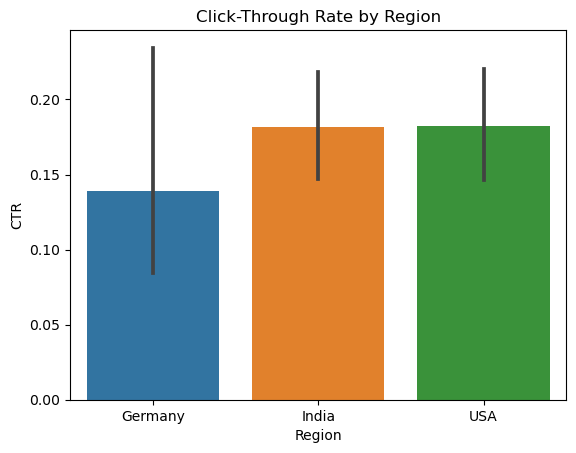

In [5]:
# CTR by Region
sns.barplot(data=df, x="Region", y="CTR")
plt.title("Click-Through Rate by Region")
plt.show()

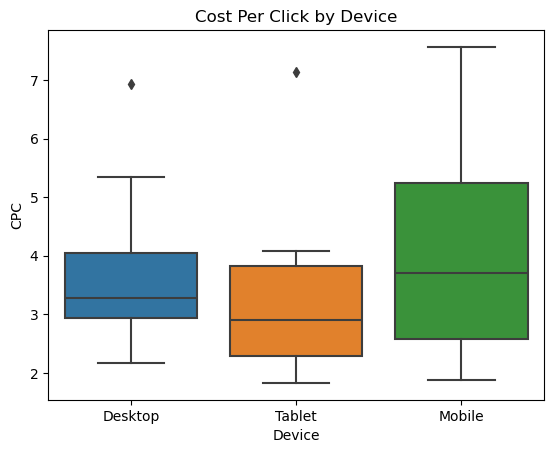

In [6]:
# CPC by Device
sns.boxplot(data=df, x="Device", y="CPC")
plt.title("Cost Per Click by Device")
plt.show()

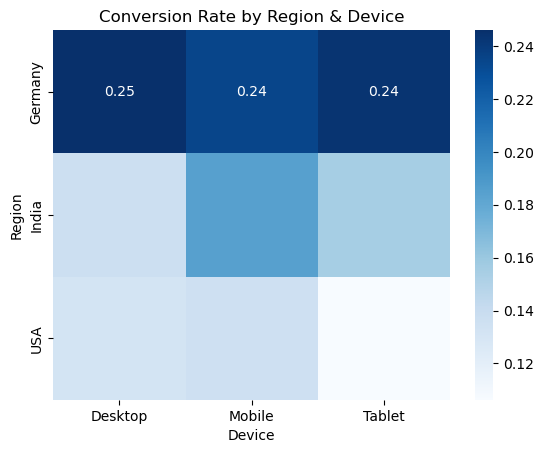

In [7]:
# Conversion Rate Heatmap
pivot = df.pivot_table(index="Region", columns="Device", values="Conversion Rate")
sns.heatmap(pivot, annot=True, cmap="Blues")
plt.title("Conversion Rate by Region & Device")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
# Select features
X = df[['Clicks', 'Impressions', 'Cost (USD)']]
y = df['Conversions']

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictions
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))

R² Score: -1.4094435593933974


In [14]:
pip install openai

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/755.1 kB ? eta -:--:--
   ----- ---------------------------------- 112.6/755.1 kB 2.2 MB/s eta 0:00:01
   --------------------------- ------------ 522.2/755.1 kB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 755.1/755.1 kB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/209.2 kB ? eta -:--:--
   --------------------------------------- 209.2/209.2 kB 12.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [19]:
import openai

In [20]:
sample = df.iloc[0]
ctr, cpc, cr = sample['CTR'], sample['CPC'], sample['Conversion Rate']

In [21]:
prompt = f"""
CTR: {ctr:.2f}, CPC: {cpc:.2f}, Conversion Rate: {cr:.2f}.
Generate 3 marketing insights for this campaign.
"""

In [24]:
def generate_insights(ctr, cpc, cr):
    insights = []

    if ctr > 0.25:
        insights.append("Great engagement — ad creative is working well.")
    elif ctr < 0.15:
        insights.append("Low CTR — try updating headlines or images.")
    else:
        insights.append("Average CTR — can be improved.")

    if cpc > 3.00:
        insights.append("CPC is high — consider revising bidding strategy.")
    else:
        insights.append("CPC is within an efficient range.")

    if cr > 0.15:
        insights.append("Strong conversion rate — landing page is effective.")
    else:
        insights.append("Low conversion — test different CTAs or offers.")

    return insights